# EDA of Review Data

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

In [45]:
def get_basic_info(review_dataset, meta_dataset):
    '''@param review_dataset, meta_dataset: type 'datasets.arrow_dataset.Dataset'''
    print(f"Tot number of reviews", len(review_dataset))
    print("Columns in metadata:", meta_dataset.column_names)

    categories_col = meta_dataset['categories']
    all_categories = [category for sublist in categories_col for category in sublist]
    unique_categories_set = set(all_categories)
    print("Number of categories:", len(unique_categories_set))
    print("Unique categories:", unique_categories_set)

In [47]:
handmade_reviews_all = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Handmade_Products",  split="full", trust_remote_code=True)
handmade_meta_all = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_Handmade_Products", split="full", trust_remote_code=True)

get_basic_info(handmade_reviews_all, handmade_meta_all)

Tot number of reviews 664162
Columns in metadata: ['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together', 'subtitle', 'author']
Number of categories: 646
Unique categories: {'Handbags & Accessories', 'Badge Clips & Reels', 'Wallets & Bag Accessories', 'Pacific MFN - Jewelry', 'Cupcake Wrappers', 'Hanging Planters', 'Pacifiers', 'Northeast FBA', 'Martini Glasses', 'Coats', 'Blankets & Quilts', 'Collars, Leashes & Accessories', 'Flasks', 'Sun Catchers', 'Pillow Protectors', 'Belts, Holsters & Slings', "Children's Furniture", 'Wall Crosses', 'Brooches, Buttons & Pins', 'Kitchen Linen', 'Throw Pillows', 'Ornaments', 'Bath Bombs', 'Hair Styling Accessories', 'Anniversary', 'Body Sprays', 'Satchels', 'Musical Toy Instruments', 'Southeast MFN', 'Stacking', 'Magnets', 'Clothing Sets', 'Pens & Pencils', 'Sporting Goods', 'Women', 'Hats & Caps', 'Hoop', 'Cleaning Supp

In [97]:
reviews_handmade = pd.read_csv('handmade_reviews.csv').drop(['Unnamed: 0'], axis=1)  # with > 5 reviews
print(len(reviews_handmade))
reviews_handmade.head()
reviews_handmade.to_csv('handmade_reviews.csv', index=False)

161979


Look at distribution of # reviews per product

In [76]:
def get_most_reviewed_prods(reviews_df, least_reviewed=False):
    ''' 
    Get most reviewed products and their counts (# reviews).
    If least_reviewed=True, get least reviewed products.
    @param reviews_df: pandas DataFrame with reviews
    '''
    print(f"Number of reviews: {reviews_df.shape[0]}")
    review_counts = reviews_df.groupby(['parent_asin']).agg({'text':'count'}).sort_values(by='text', ascending=least_reviewed)
    review_counts = review_counts.reset_index()
    review_counts = review_counts.rename({'text':'numb_of_revs'}, axis='columns')
    print(f"Number of unique reviews: {review_counts.shape[0]}")
    k = 10
    print(f'Top {k} most reviewed:\n', review_counts.head(k),'\n')
    print(review_counts['numb_of_revs'].describe())

In [78]:
get_most_reviewed_prods(reviews_handmade)

Number of reviews: 161979
Number of unique reviews: 1376
Top 10 most reviewed:
   parent_asin  numb_of_revs
0  B01I8XISM2            49
1  B076566WZP            50
2  B01M333BMQ            50
3  B09MG1S9NB            50
4  B09M2VY4VG            50
5  B01AIISZZK            50
6  B01MR74VXZ            50
7  B07V37D7YK            50
8  B0BMZ3B3KS            50
9  B07BH69XN2            50 

count    1376.000000
mean      117.670785
std       127.303977
min        49.000000
25%        62.000000
50%        81.000000
75%       125.000000
max      2498.000000
Name: numb_of_revs, dtype: float64


In [74]:
# Convert ALL handmade_reviews_all to pandas dataframe
# handmade_reviews_df = handmade_reviews_all.to_pandas()
# handmade_reviews_df.head()
# len(handmade_reviews_df)

664162

In [79]:
# get_most_reviewed_prods(handmade_reviews_df)

Number of reviews: 664162
Number of unique reviews: 164728
Top 10 most reviewed:
   parent_asin  numb_of_revs
0  B09GK2JJDZ          2498
1  B07RC9FWLN          1305
2  B01G29HQ8G          1088
3  B01ASDYQQC          1044
4  B01N5SVHUU           972
5  B083Q2N1KQ           913
6  B07NP52Y1F           896
7  B015NSJ11W           887
8  B081732LNJ           766
9  B015HVACEA           734 

count    164728.000000
mean          4.031871
std          16.397329
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        2498.000000
Name: numb_of_revs, dtype: float64


The ratings are heavily skewed towards 5-star ratings, so we balance the dataset.

Total number of reviews: 664162


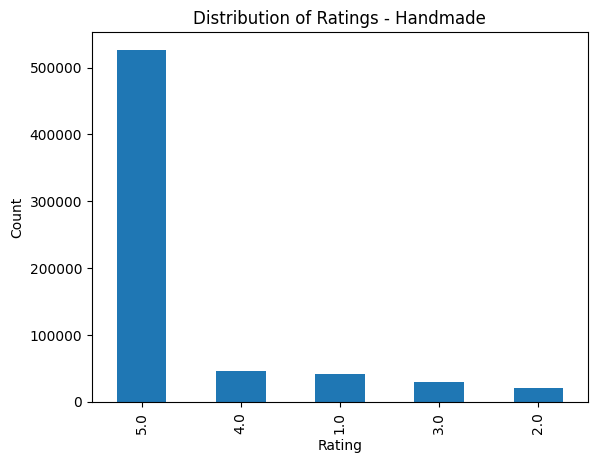

In [80]:
# # Distribution of ratings ALL
# print(f"Total number of reviews: {len(handmade_reviews_df)}")
# handmade_reviews_df['rating'].value_counts().plot(kind='bar')
# plt.title('Distribution of Ratings - Handmade')
# plt.xlabel('Rating')
# plt.ylabel('Count')
# plt.show()

In [81]:
def balance_by_rating(reviews, filename_write=None):
    '''
    Balance the reviews by rating, so that there are equal number of reviews for each rating.
    @param reviews: df of reviews
    @param rating_col: column name for the ratings
    '''
    # Get the number of reviews for each rating
    rating_counts = reviews['rating'].value_counts()
    min_rating_count = rating_counts.min()
    print(f"Min rating count: {min_rating_count}")
    balanced_reviews = pd.DataFrame()
    for rating in rating_counts.index:
        rating_reviews = reviews[reviews['rating'] == rating].sample(n=min_rating_count)
        balanced_reviews = pd.concat([balanced_reviews, rating_reviews])
    if filename_write:
        balanced_reviews.to_csv(filename_write, index=False)
    return balanced_reviews

In [ ]:
proc_reviews_df = pd.read_csv('handmade_reviews_processed.csv')
# Balance the reviews by rating
balance_by_rating(proc_reviews_df, filename_write='handmade_reviews_balanced.csv')

Total number of reviews: 26236


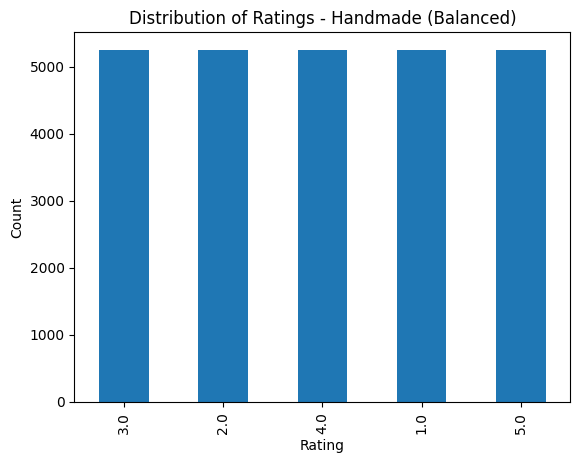

In [87]:
# After balancing
handmade_balanced = pd.read_csv('handmade_reviews_balanced.csv').dropna(subset=['text'])
print(f"Total number of reviews: {len(handmade_balanced)}")
handmade_balanced['rating'].value_counts().plot(kind='bar')
plt.title('Distribution of Ratings - Handmade (Balanced)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [84]:
get_most_reviewed_prods(handmade_balanced, least_reviewed=True)

Number of reviews: 26335
Number of unique reviews: 1375
Top 10 most reviewed:
   parent_asin  numb_of_revs
0  B07NPYGTDQ             1
1  B01M7XCUNS             1
2  B084KKY1NG             1
3  B0BH9F6JXC             1
4  B074CFZ4MZ             1
5  B073Z4FWYZ             1
6  B078DZQ8PP             1
7  B01CB0X6KC             1
8  B0933GS1V6             1
9  B07YM2CTVD             1 

count    1375.000000
mean       19.080727
std        25.274620
min         1.000000
25%         7.000000
50%        13.000000
75%        21.000000
max       328.000000
Name: numb_of_revs, dtype: float64


# Feature Properties

In [59]:
handmade_features = pd.read_csv('handmade_nouns_spacy.csv')
handmade_features = handmade_features.rename(columns = {'Unnamed: 0':'noun'})
print(f"Total number of nouns: {len(handmade_features)}")
print(f"Number nouns with freq=1: {len(handmade_features[handmade_features['count'] == 1])}")
print(f"Number nouns with freq<5: {len(handmade_features[handmade_features['count'] < 5])}")


# Filter df to only have nouns with > k occurrences
k = 100
handmade_features_filt = handmade_features[handmade_features['count'] > k]
print(f"Length of features with freq > {k}: {len(handmade_features_filt)}")
handmade_features_filt.head()

Total number of nouns: 7235
Number nouns with freq=1: 3483
Number nouns with freq<5: 5166
Length of features with freq > 100: 272


,noun,count
0,love,3224
1,gift,2703
2,quality,2437
3,product,2357
4,order,2133


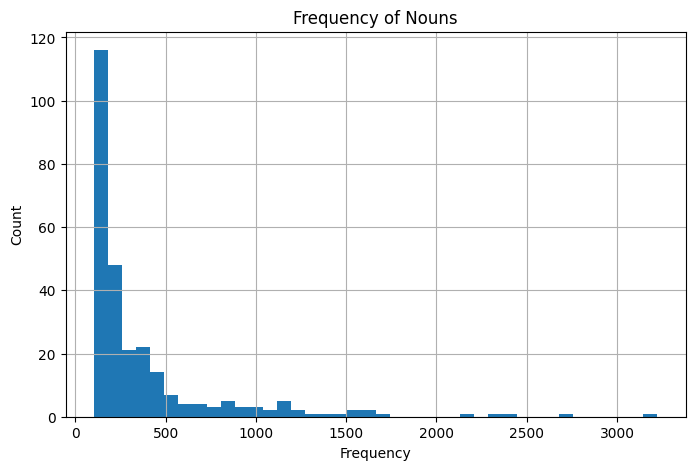

In [60]:
# Histogram of noun frequencies > 100 
plt.figure(figsize=(8, 5))
plt.hist(handmade_features_filt['count'], bins='auto') 
plt.title('Frequency of Nouns')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.grid(True)
plt.show()

267


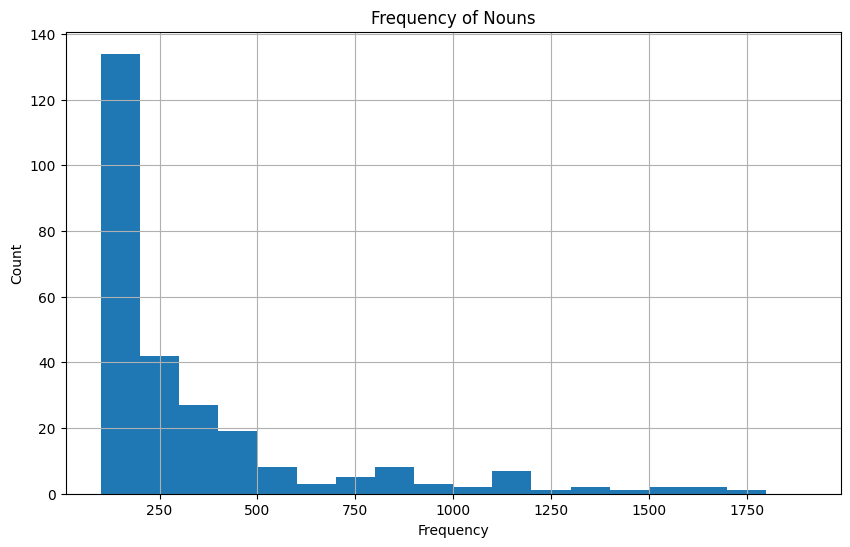

In [61]:
# Create df with features between freuqncy 100-2000
handmade_features_midrange = handmade_features_filt[handmade_features_filt['count'] < 2000]
print(len(handmade_features_midrange)) 
# Histogram of noun frequencies 
plt.figure(figsize=(10, 6))
plt.hist(handmade_features_midrange['count'], bins=np.arange(100, 2000, 100))
plt.title('Frequency of Nouns')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.grid(True)
plt.show()